# Disney Wait Times Analysis with respect to weather

## Importing and testing 

In [132]:
import pandas as pd

weather = pd.read_csv('./data/weather_data.csv')
wait_times = pd.read_csv('./data/waiting_times.csv')

In [133]:
print(wait_times.head())
wait_times.describe

    WORK_DATE                 DEB_TIME  DEB_TIME_HOUR  \
0  2018-01-01  2018-01-01 21:00:00.000             21   
1  2018-01-01  2018-01-01 19:30:00.000             19   
2  2018-01-01  2018-01-01 22:30:00.000             22   
3  2018-01-01  2018-01-01 12:45:00.000             12   
4  2018-01-01  2018-01-01 17:00:00.000             17   

                  FIN_TIME ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  NB_UNITS  \
0  2018-01-01 21:15:00.000           Roller Coaster              0       2.0   
1  2018-01-01 19:45:00.000              Bumper Cars              5      18.0   
2  2018-01-01 22:45:00.000              Rapids Ride              0       1.0   
3  2018-01-01 13:00:00.000              Crazy Dance              5       1.0   
4  2018-01-01 17:15:00.000                   Skyway              5      15.0   

   GUEST_CARRIED  CAPACITY  ADJUST_CAPACITY  OPEN_TIME  UP_TIME  DOWNTIME  \
0            0.0     0.000             0.00          0        0         0   
1          148.0   254

<bound method NDFrame.describe of           WORK_DATE                 DEB_TIME  DEB_TIME_HOUR  \
0        2018-01-01  2018-01-01 21:00:00.000             21   
1        2018-01-01  2018-01-01 19:30:00.000             19   
2        2018-01-01  2018-01-01 22:30:00.000             22   
3        2018-01-01  2018-01-01 12:45:00.000             12   
4        2018-01-01  2018-01-01 17:00:00.000             17   
...             ...                      ...            ...   
3509319  2022-08-18  2022-08-18 18:45:00.000             18   
3509320  2022-08-18  2022-08-18 10:15:00.000             10   
3509321  2022-08-18  2022-08-18 09:15:00.000              9   
3509322  2022-08-18  2022-08-18 20:30:00.000             20   
3509323  2022-08-18  2022-08-18 10:45:00.000             10   

                        FIN_TIME ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  \
0        2018-01-01 21:15:00.000           Roller Coaster              0   
1        2018-01-01 19:45:00.000              Bumper Cars

In [134]:
print(weather.head())
weather.describe

          dt                         dt_iso  timezone        city_name  \
0  915148800  1999-01-01 00:00:00 +0000 UTC      3600  Custom location   
1  915152400  1999-01-01 01:00:00 +0000 UTC      3600  Custom location   
2  915156000  1999-01-01 02:00:00 +0000 UTC      3600  Custom location   
3  915159600  1999-01-01 03:00:00 +0000 UTC      3600  Custom location   
4  915163200  1999-01-01 04:00:00 +0000 UTC      3600  Custom location   

         lat       lon  temp  visibility  dew_point  feels_like  ...  \
0  48.873492  2.295104  8.33         NaN       3.39        5.28  ...   
1  48.873492  2.295104  8.08         NaN       3.54        5.18  ...   
2  48.873492  2.295104  8.08         NaN       4.11        5.38  ...   
3  48.873492  2.295104  7.31         NaN       3.73        4.42  ...   
4  48.873492  2.295104  6.91         NaN       3.53        4.00  ...   

   wind_gust  rain_1h  rain_3h  snow_1h  snow_3h  clouds_all  weather_id  \
0        NaN      NaN      NaN      NaN      N

<bound method NDFrame.describe of                 dt                         dt_iso  timezone        city_name  \
0        915148800  1999-01-01 00:00:00 +0000 UTC      3600  Custom location   
1        915152400  1999-01-01 01:00:00 +0000 UTC      3600  Custom location   
2        915156000  1999-01-01 02:00:00 +0000 UTC      3600  Custom location   
3        915159600  1999-01-01 03:00:00 +0000 UTC      3600  Custom location   
4        915163200  1999-01-01 04:00:00 +0000 UTC      3600  Custom location   
...            ...                            ...       ...              ...   
207259  1661281200  2022-08-23 19:00:00 +0000 UTC      7200  Custom location   
207260  1661284800  2022-08-23 20:00:00 +0000 UTC      7200  Custom location   
207261  1661288400  2022-08-23 21:00:00 +0000 UTC      7200  Custom location   
207262  1661292000  2022-08-23 22:00:00 +0000 UTC      7200  Custom location   
207263  1661295600  2022-08-23 23:00:00 +0000 UTC      7200  Custom location   

     

## Creating two new df's from weather and wait_times for merging

In [135]:
wait_times_new = wait_times.copy()
wait_times_new = wait_times_new.dropna(subset=['CAPACITY', 'WAIT_TIME_MAX'], how='any')
wait_times_new['DateTime'] = pd.to_datetime(wait_times_new['DEB_TIME'])
wait_times_new['year'] = wait_times_new['DateTime'].dt.year
wait_times_new['hour'] = wait_times_new['DateTime'].dt.hour

wait_times_new['DEB_TIME'] = pd.to_datetime(wait_times_new['DEB_TIME'])

wait_times_new_rapids = wait_times_new[(wait_times_new['CAPACITY'] != 0) & (wait_times_new['ENTITY_DESCRIPTION_SHORT'] == "Rapids Ride")]

wait_times_new_rapids = wait_times_new_rapids[['DEB_TIME', 'year', 'hour', 'ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX', 'GUEST_CARRIED', 'ADJUST_CAPACITY']]

wait_times_new_rapids

,DEB_TIME,year,hour,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,GUEST_CARRIED,ADJUST_CAPACITY
44,2018-01-01 11:00:00,2018,11,Rapids Ride,5,7.000,154.1170
99,2018-01-01 11:15:00,2018,11,Rapids Ride,5,0.000,0.0000
127,2018-01-01 11:45:00,2018,11,Rapids Ride,5,7.000,165.2500
173,2018-01-01 12:30:00,2018,12,Rapids Ride,5,30.000,165.2500
360,2018-01-01 17:00:00,2018,17,Rapids Ride,5,16.000,88.1333
...,...,...,...,...,...,...,...
3508931,2022-08-18 16:00:00,2022,16,Rapids Ride,15,241.001,330.2500
3508940,2022-08-18 11:30:00,2022,11,Rapids Ride,15,241.001,330.2500
3509077,2022-08-18 10:30:00,2022,10,Rapids Ride,5,241.001,330.2500
3509103,2022-08-18 12:15:00,2022,12,Rapids Ride,15,241.001,330.2500


In [136]:
weather_new = weather.copy()
weather_new = weather_new.dropna(subset=['dt', 'temp'], how='any')
weather_new['DateTime'] = pd.to_datetime(weather_new['dt'], unit='s')
weather_new['year'] = weather_new['DateTime'].dt.year
weather_new['hour'] = weather_new['DateTime'].dt.hour
weather_new = weather_new[weather_new['year'] >= 2018]

weather_new['DEB_TIME'] = pd.to_datetime(weather_new['dt'], unit='s')
weather_new = weather_new[['DEB_TIME', 'year', 'hour', 'temp', 'dew_point', 'feels_like']]

weather_new



,DEB_TIME,year,hour,temp,dew_point,feels_like
166560,2018-01-01 00:00:00,2018,0,8.94,4.56,5.21
166561,2018-01-01 01:00:00,2018,1,8.07,3.72,4.09
166562,2018-01-01 02:00:00,2018,2,7.76,3.42,3.81
166563,2018-01-01 03:00:00,2018,3,7.57,3.43,3.63
166564,2018-01-01 04:00:00,2018,4,6.86,3.30,2.88
...,...,...,...,...,...,...
207259,2022-08-23 19:00:00,2022,19,24.89,18.34,25.18
207260,2022-08-23 20:00:00,2022,20,23.06,18.18,23.35
207261,2022-08-23 21:00:00,2022,21,21.83,18.42,22.18
207262,2022-08-23 22:00:00,2022,22,21.08,18.46,21.46


### Merging

In [137]:
matching_rapids = pd.merge(wait_times_new_rapids, weather_new, on=['DEB_TIME'], how='inner')

matching_rapids

,DEB_TIME,year_x,hour_x,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,GUEST_CARRIED,ADJUST_CAPACITY,year_y,hour_y,temp,dew_point,feels_like
0,2018-01-01 11:00:00,2018,11,Rapids Ride,5,7.0000,154.1170,2018,11,6.35,4.99,1.46
1,2018-01-01 17:00:00,2018,17,Rapids Ride,5,16.0000,88.1333,2018,17,7.76,5.57,3.30
2,2018-01-01 14:00:00,2018,14,Rapids Ride,5,2.0000,22.0333,2018,14,9.12,7.40,5.31
3,2018-01-01 15:00:00,2018,15,Rapids Ride,5,103.0000,165.2500,2018,15,8.07,5.70,3.99
4,2018-01-01 13:00:00,2018,13,Rapids Ride,5,36.0002,165.2500,2018,13,8.34,7.28,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
12210,2022-08-18 19:00:00,2022,19,Rapids Ride,25,241.0010,330.2500,2022,19,24.20,17.69,24.43
12211,2022-08-18 15:00:00,2022,15,Rapids Ride,20,241.0010,330.2500,2022,15,28.06,17.59,28.80
12212,2022-08-18 14:00:00,2022,14,Rapids Ride,20,241.0010,330.2500,2022,14,28.20,16.48,28.58
12213,2022-08-18 16:00:00,2022,16,Rapids Ride,15,241.0010,330.2500,2022,16,27.46,18.74,28.60


## Scatter plot of GUEST_CARRIED from Rapids Ride compared to feels_like

Text(0.5, 1.0, 'Guests Carried vs Feels Like Temperature')

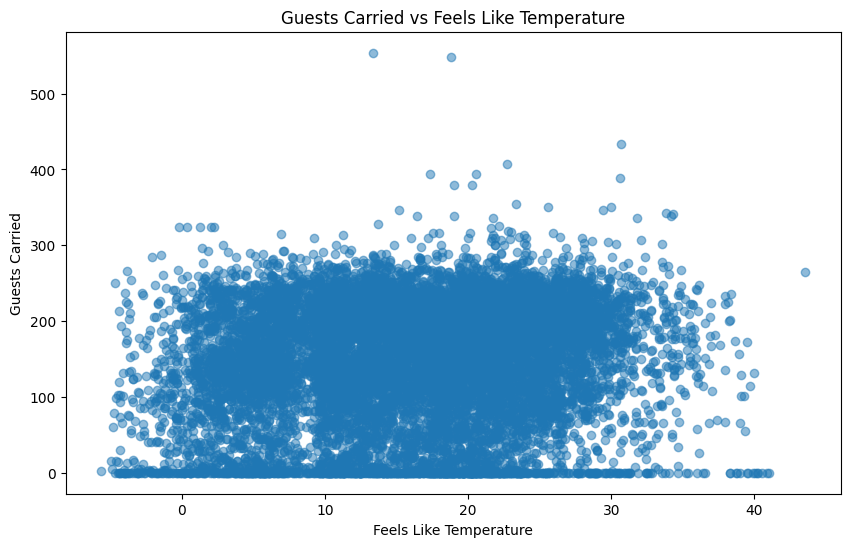

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

plt.figure(figsize=(10,6))
plt.scatter(matching_rapids['feels_like'], matching_rapids['GUEST_CARRIED'], alpha=0.5)
plt.xlabel('Feels Like Temperature')
plt.ylabel('Guests Carried')
plt.title('Guests Carried vs Feels Like Temperature')


### Doesn't seem to be any clear correlation from data on whether weather affects wait times

## Testing Hypothesis using Pearsons Correlation 

In [139]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(matching_rapids['feels_like'], matching_rapids['GUEST_CARRIED'])
print(f"Correlation: {corr}, p-value: {p_value}")

Correlation: 0.14095328667180673, p-value: 3.0717701051019106e-55


### Low correlation value confirms the hyopthesis from the graph. But since the dataset is so large, the this value could be forced lower due to the averaging across the dataset. Even 0.03 could be signifcant if we have millions of rows. The p-value of 0 confirms that this correlation value is statistically significant. But there are some outlying points that seem to be incorrect. 

In [140]:
matching_rapids = matching_rapids[matching_rapids['GUEST_CARRIED'] < matching_rapids['ADJUST_CAPACITY']]

Text(0.5, 1.0, 'Guests Carried vs Feels Like Temperature')

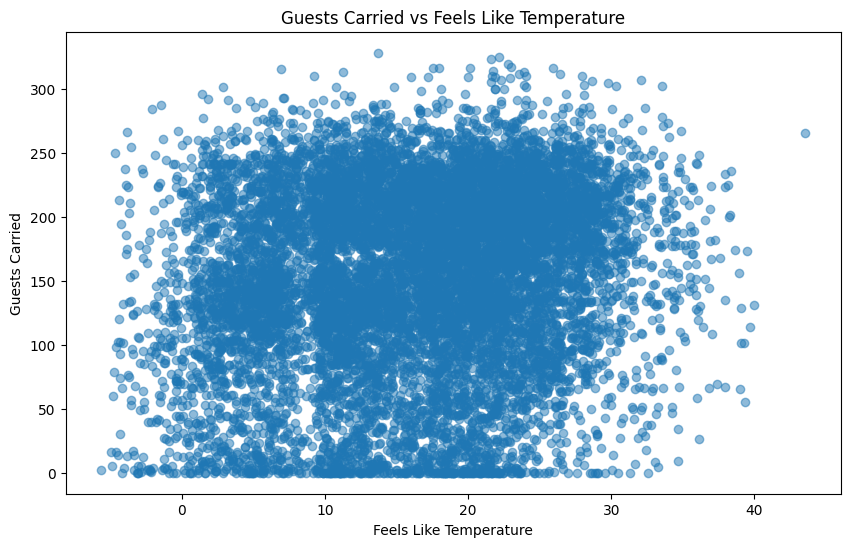

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(matching_rapids['feels_like'], matching_rapids['GUEST_CARRIED'], alpha=0.5)
plt.xlabel('Feels Like Temperature')
plt.ylabel('Guests Carried')
plt.title('Guests Carried vs Feels Like Temperature')

In [142]:
corr, p_value = pearsonr(matching_rapids['feels_like'], matching_rapids['GUEST_CARRIED'])
print(f"Correlation: {corr}, p-value: {p_value}")

Correlation: 0.15583342420474244, p-value: 2.0595021501184464e-63


### Similar correlation and p-value even with the outliers removed. Correlation slightly higher.

## Graphing using boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

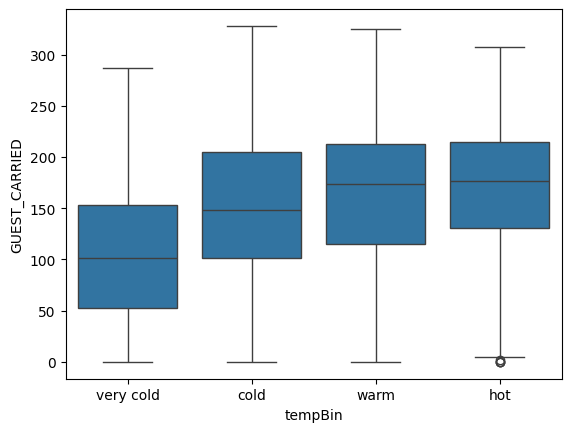

In [170]:
import seaborn as sns
matching_rapids.loc[:, 'tempBin'] = pd.cut(matching_rapids['feels_like'], bins=[-10, 0, 15, 30, 50], labels=['very cold', 'cold', 'warm', 'hot'])
sns.boxplot(x='tempBin', y='GUEST_CARRIED', data=matching_rapids)
plt.show

### In the hot column, there are a substantial amount of outliers that suggest that the true mean of the hot bin is greater than shown

## Pivot Table test to determine what test I can use on boxplot

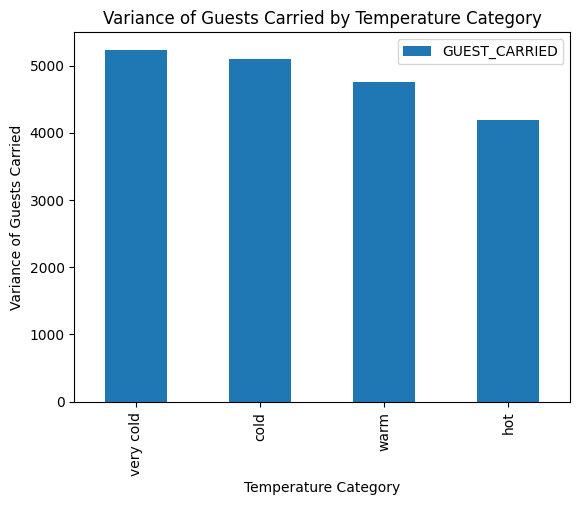

In [180]:
pivot = matching_rapids.pivot_table(values='GUEST_CARRIED', index='tempBin', aggfunc='var', observed=True)

pivot.plot(kind='bar')
plt.title('Variance of Guests Carried by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Variance of Guests Carried')
plt.show()

### Very high variance differences

## Using Kruskal-Wallis H Test (ANOVA alternative test for when variance differs significantly and data is not necessarily normal) on boxplot

In [181]:
from scipy.stats import kruskal
very_cold = matching_rapids[matching_rapids['tempBin'] == 'very cold']['GUEST_CARRIED']
cold = matching_rapids[matching_rapids['tempBin'] == 'cold']['GUEST_CARRIED']
warm = matching_rapids[matching_rapids['tempBin'] == 'warm']['GUEST_CARRIED']
hot = matching_rapids[matching_rapids['tempBin'] == 'hot']['GUEST_CARRIED']

kruskal_result= kruskal(very_cold, cold, warm, hot)
print('Kruskal-Wallis H-statistic: ', kruskal_result.statistic)
print('Kruskal-Wallis p-value', kruskal_result.pvalue)

Kruskal-Wallis H-statistic:  213.5242856865936
Kruskal-Wallis p-value 5.0405046895692464e-46


### This Kruskal-Wallis H-statistic calculation of 14358 states that there is a great difference between the temperature groups. The low p-value of 0 affirms this statement. From this test, it seems that there could a statistically significant difference between the groups. Now, take a look at the means.

In [182]:
print(matching_rapids.groupby('tempBin', observed=True)['GUEST_CARRIED'].mean())

tempBin
very cold    107.205937
cold         146.537351
warm         160.535102
hot          166.499997
Name: GUEST_CARRIED, dtype: float64


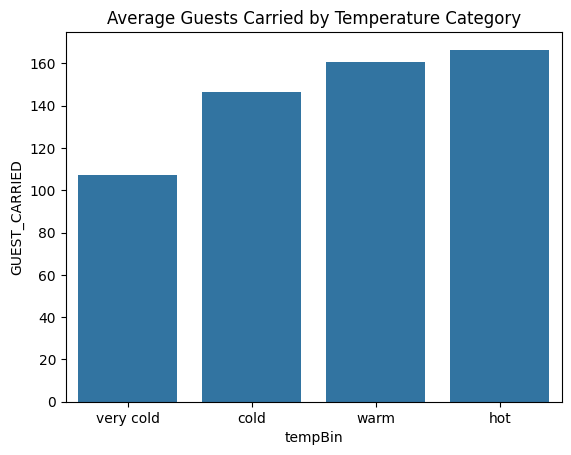

In [183]:
sns.barplot(x='tempBin', y='GUEST_CARRIED', data=matching_rapids, errorbar=None)
plt.title('Average Guests Carried by Temperature Category')
plt.show()

## Correlation Matrix for Fun

<function matplotlib.pyplot.show(close=None, block=None)>

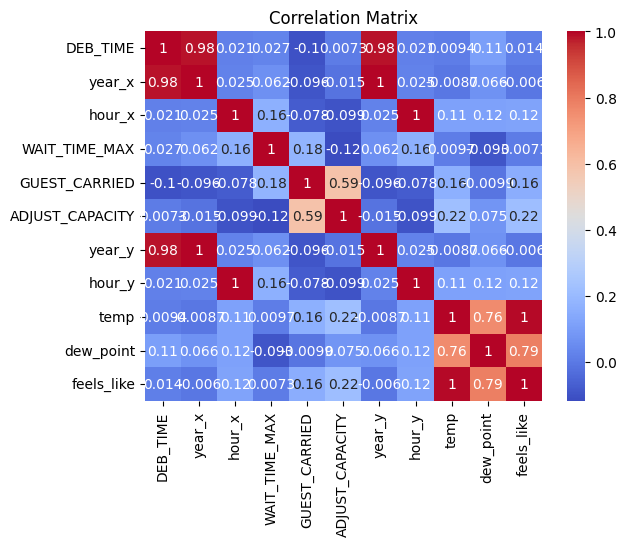

In [184]:
correlation_df = matching_rapids.drop(columns=['ENTITY_DESCRIPTION_SHORT', 'tempBin'], inplace=False)
correlation_matrix = correlation_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show

### Once more, we can determine that the correlation between GUEST_CARRIED and feels_like seems to be minimal. But it seems that the correlation between WAIT_TIME_MAX and feels_like is slightly higher

## Overall, we can conclude that weather does affect the wait times for specific rides at Disneyland Paris, particularly the rapids ride. The Pearson's correlation test shows a very weak linear relationship between weather and wait times, with a correlation coefficient of 0.03. Although this correlation is statistically significant (p-value of 0), it is not practically meaningful due to its minimal strength. However, the Kruskal-Wallis H test, which is more robust to non-linear relationships and differences in variances, reveals that when weather is categorized into bins of very cold, cold, warm, and hot, there are statistically significant differences in wait times across these categories. This indicates that different weather conditions have a notable impact on wait times, with significant variations observed between the different temperature bins.

# Now Using Scikit Learn to try and create a model

## Preproccesing

### Setting up the df

In [185]:
wait_times_sk = wait_times.copy()
wait_times_sk['DateTime'] = pd.to_datetime(wait_times_sk['DEB_TIME'])
wait_times_sk['year'] = wait_times_sk['DateTime'].dt.year
wait_times_sk['hour'] = wait_times_sk['DateTime'].dt.hour

wait_times_sk['WORK_DATE'] = pd.to_datetime(wait_times_sk['WORK_DATE'])
wait_times_sk['DAY'] = wait_times_sk['WORK_DATE'].dt.day_name()
wait_times_sk['MONTH'] = wait_times_sk['WORK_DATE'].dt.month_name()

wait_times_sk['DEB_TIME'] = pd.to_datetime(wait_times_sk['DEB_TIME'])

wait_times_sk = wait_times_sk[(wait_times_sk['CAPACITY'] != 0) & (wait_times_sk['ENTITY_DESCRIPTION_SHORT'] == "Rapids Ride")]

wait_times_sk = wait_times_sk[['DEB_TIME', 'year', 'hour', 'WAIT_TIME_MAX', 'GUEST_CARRIED', 'ADJUST_CAPACITY', 'MONTH', 'DAY', 'OPEN_TIME', 'NB_UNITS']]
wait_times_sk

,DEB_TIME,year,hour,WAIT_TIME_MAX,GUEST_CARRIED,ADJUST_CAPACITY,MONTH,DAY,OPEN_TIME,NB_UNITS
44,2018-01-01 11:00:00,2018,11,5,7.000,154.1170,January,Monday,15,2.0
99,2018-01-01 11:15:00,2018,11,5,0.000,0.0000,January,Monday,15,2.0
127,2018-01-01 11:45:00,2018,11,5,7.000,165.2500,January,Monday,15,1.0
173,2018-01-01 12:30:00,2018,12,5,30.000,165.2500,January,Monday,15,1.0
360,2018-01-01 17:00:00,2018,17,5,16.000,88.1333,January,Monday,8,1.0
...,...,...,...,...,...,...,...,...,...,...
3508931,2022-08-18 16:00:00,2022,16,15,241.001,330.2500,August,Thursday,15,2.0
3508940,2022-08-18 11:30:00,2022,11,15,241.001,330.2500,August,Thursday,15,2.0
3509077,2022-08-18 10:30:00,2022,10,5,241.001,330.2500,August,Thursday,15,2.0
3509103,2022-08-18 12:15:00,2022,12,15,241.001,330.2500,August,Thursday,15,2.0


In [186]:
weather_sk = weather.copy()
weather_sk['DateTime'] = pd.to_datetime(weather_sk['dt'], unit='s')
weather_sk['year'] = weather_sk['DateTime'].dt.year
weather_sk['hour'] = weather_sk['DateTime'].dt.hour
weather_sk = weather_sk[weather_sk['year'] >= 2018]

weather_sk['DEB_TIME'] = pd.to_datetime(weather_sk['dt'], unit='s')

weather_sk = weather_sk.drop(columns=['dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'visibility', 'weather_id', 'weather_icon', 'sea_level', 'grnd_level', 'DateTime'])

weather_sk

,dt,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,year,hour,DEB_TIME
166560,1514764800,8.94,4.56,5.21,7.70,9.60,1007,74,8.32,233,...,NaN,NaN,NaN,NaN,23,Clouds,few clouds,2018,0,2018-01-01 00:00:00
166561,1514768400,8.07,3.72,4.09,7.70,8.60,1008,74,8.26,238,...,NaN,NaN,NaN,NaN,4,Clear,sky is clear,2018,1,2018-01-01 01:00:00
166562,1514772000,7.76,3.42,3.81,7.31,7.94,1009,74,7.81,240,...,NaN,NaN,NaN,NaN,27,Clouds,scattered clouds,2018,2,2018-01-01 02:00:00
166563,1514775600,7.57,3.43,3.63,6.74,7.94,1010,75,7.59,241,...,NaN,NaN,NaN,NaN,78,Clouds,broken clouds,2018,3,2018-01-01 03:00:00
166564,1514779200,6.86,3.30,2.88,5.74,7.60,1010,78,7.06,237,...,NaN,NaN,NaN,NaN,52,Clouds,broken clouds,2018,4,2018-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207259,1661281200,24.89,18.34,25.18,23.74,25.86,1016,67,1.34,297,...,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,2022,19,2022-08-23 19:00:00
207260,1661284800,23.06,18.18,23.35,21.38,24.86,1017,74,0.70,345,...,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,2022,20,2022-08-23 20:00:00
207261,1661288400,21.83,18.42,22.18,19.71,23.86,1017,81,0.70,345,...,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,2022,21,2022-08-23 21:00:00
207262,1661292000,21.08,18.46,21.46,19.90,22.86,1017,85,0.70,345,...,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,2022,22,2022-08-23 22:00:00


In [187]:
merged_sk = pd.merge(wait_times_sk, weather_sk, on=['DEB_TIME'])
merged_sk 

,DEB_TIME,year_x,hour_x,WAIT_TIME_MAX,GUEST_CARRIED,ADJUST_CAPACITY,MONTH,DAY,OPEN_TIME,NB_UNITS,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,year_y,hour_y
0,2018-01-01 11:00:00,2018,11,5,7.0000,154.1170,January,Monday,15,2.0,...,NaN,2.01,NaN,NaN,NaN,100,Rain,moderate rain,2018,11
1,2018-01-01 17:00:00,2018,17,5,16.0000,88.1333,January,Monday,8,1.0,...,NaN,0.25,NaN,NaN,NaN,100,Rain,light rain,2018,17
2,2018-01-01 14:00:00,2018,14,5,2.0000,22.0333,January,Monday,15,1.0,...,NaN,0.18,NaN,NaN,NaN,97,Rain,light rain,2018,14
3,2018-01-01 15:00:00,2018,15,5,103.0000,165.2500,January,Monday,15,1.0,...,NaN,2.34,NaN,NaN,NaN,72,Rain,moderate rain,2018,15
4,2018-01-01 13:00:00,2018,13,5,36.0002,165.2500,January,Monday,15,1.0,...,NaN,0.82,NaN,NaN,NaN,83,Rain,light rain,2018,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12210,2022-08-18 19:00:00,2022,19,25,241.0010,330.2500,August,Thursday,15,2.0,...,4.79,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,2022,19
12211,2022-08-18 15:00:00,2022,15,20,241.0010,330.2500,August,Thursday,15,2.0,...,3.85,NaN,NaN,NaN,NaN,94,Clouds,overcast clouds,2022,15
12212,2022-08-18 14:00:00,2022,14,20,241.0010,330.2500,August,Thursday,15,2.0,...,3.85,NaN,NaN,NaN,NaN,94,Clouds,overcast clouds,2022,14
12213,2022-08-18 16:00:00,2022,16,15,241.0010,330.2500,August,Thursday,15,2.0,...,3.85,NaN,NaN,NaN,NaN,94,Clouds,overcast clouds,2022,16


### Encoding data using One-Hot Encoding

In [188]:
merged_sk = pd.get_dummies(merged_sk, columns=['DAY', 'MONTH', 'weather_main', 'weather_description'])